In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *
from bias_utils import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
test_set = pd.read_csv('/mnt/data/HSC/3_model_comparison/testing_v1.csv')

In [3]:
test_set.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
training_4321 = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_[4, 3, 2, 1]#1.csv')

In [5]:
training_4321.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
training_1111 = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_[1, 1, 1, 1]#1.csv')

In [7]:
training_1111.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
X_train_4321 = training_4321.loc[:,'g_cmodel_mag':'y_cmodel_mag']
y_train_4321 = training_4321.loc[:, 'specz_redshift']
X_train_1111 = training_1111.loc[:,'g_cmodel_mag':'y_cmodel_mag']
y_train_1111 = training_1111.loc[:, 'specz_redshift']

In [9]:
X_test = test_set.loc[:,'g_cmodel_mag':'y_cmodel_mag']
y_test = test_set.loc[:, 'specz_redshift']

In [10]:
scaler_4321 = StandardScaler()
scaler_4321.fit(X_train_4321) # don't fit X_test !!
X_train_4321 = scaler_4321.transform(X_train_4321)
X_test_4321 = scaler_4321.transform(X_test)

In [11]:
scaler_1111 = StandardScaler()
scaler_1111.fit(X_train_1111) # don't fit X_test !!
X_train_1111 = scaler_1111.transform(X_train_1111)
X_test_1111 = scaler_1111.transform(X_test)

In [12]:
rand_forest_model = RandomForestRegressor(n_estimators=200)
rand_forest_model.fit(X_train_4321, y_train_4321)

RandomForestRegressor(n_estimators=200)

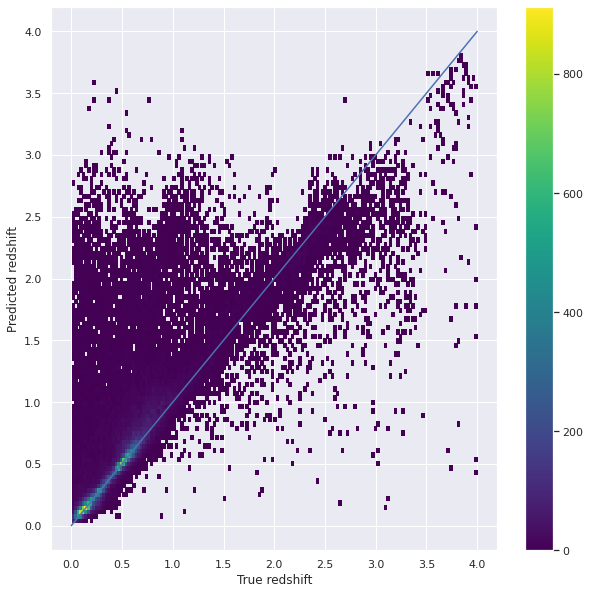

In [15]:
y_test_pred_4321 = rand_forest_model.predict(X_test_4321)
y_test_pred_4321 = pd.Series(y_test_pred_4321)
plot_predictions(y_test_pred_4321, y_test)

In [16]:
rand_forest_model = RandomForestRegressor(n_estimators=200)
rand_forest_model.fit(X_train_1111, y_train_1111)

RandomForestRegressor(n_estimators=200)

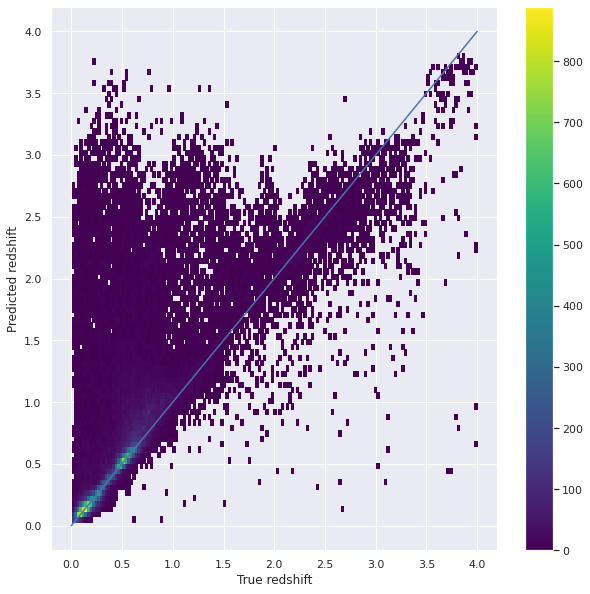

In [17]:
y_test_pred_1111 = rand_forest_model.predict(X_test_1111)
y_test_pred_1111 = pd.Series(y_test_pred_1111)
plot_predictions(y_test_pred_1111, y_test)

In [18]:
y_test = pd.Series(y_test)

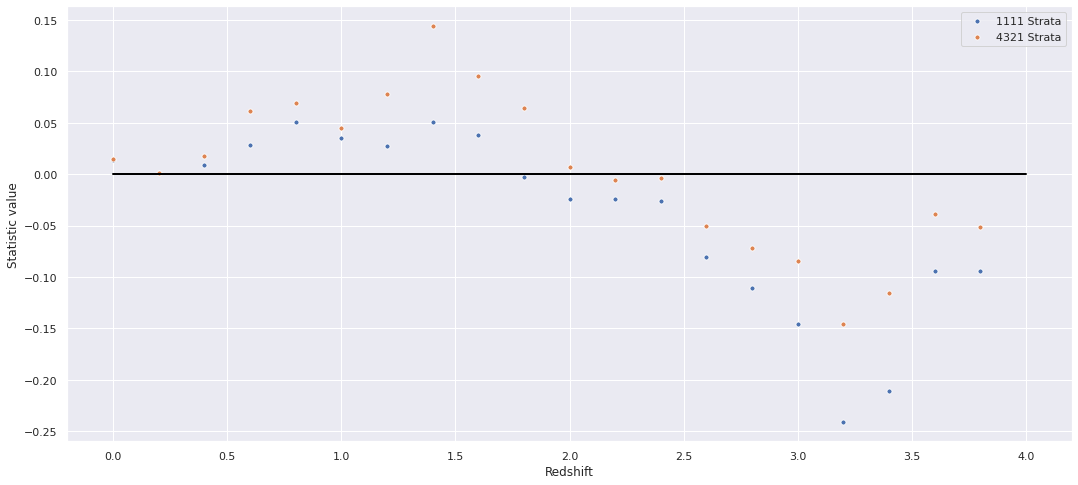

In [19]:
bias_4321 = get_bias(y_test, y_test_pred_4321)
bias_1111 = get_bias(y_test, y_test_pred_1111)
plot_bias([bias_4321, bias_1111], ['1111 Strata', '4321 Strata'])